## CS-E5795 - Computational Methods in Stochastics D

## Assignment 1

## GGL

In [ ]:
import random
from datetime import datetime

## GGL random number generator
class GGL:
    # If nothing given to the constructor, 123981293182 is used for the seed
    def __init__ (self,seed=123981293182): 
        self.x = seed
    
    # Return current state of the RNG
    def get_state(self):
        print(self.x/pow(2,31))
        return self.x

    # Return next state of the RNG
    def get_next(self):
        self.x = (16807*self.x)%(pow(2,31)-1)
        return self.x

    #Return an (n)size array of RNG 
    def get_list(self,n):
        arr = []
        for i in range(n):
          arr.append(self.get_next()/(pow(2,31)-1))
        return arr

In [ ]:
#Create and ininitializei the GGL RNG
ggl = GGL()

In [ ]:
#Array of 3'000'000 rng
ggl_array = ggl.get_list(3000000)

print(ggl_array[1:20])

[0.8343749380830559, 0.3395843619199397, 0.3943707884263111, 0.18984108101103506, 0.6590485524661134, 0.629021297967537, 0.9609549403940117, 0.7696832021557182, 0.06557863115592796, 0.18005383768121425, 0.1648499081678921, 0.6324065777624056, 0.8573524527518789, 0.5226734008279971, 0.5718477161470091, 0.04456528278280296, 0.008707730569274971, 0.3508276778044308, 0.3607808590683997]


In [ ]:
#Split ggl_array in even and odd indexes
ggl_x = ggl_array[1::2]
ggl_y = ggl_array[0::2]

In [ ]:
import matplotlib.pyplot as plt

def plot_rng(data,name_plot):

  #Split data in even and odd indexes
  data_x = data[0::2]
  data_y = data[1::2]

  #Plot the distribution and corresponding mean/var
  plt.scatter(data_x,data_y,s=20,c='blue')
  plt.axis([0.1,0.1010,0,1])
  plt.title("{} /  mean : {}  var : {}".format(name_plot,np.mean(data),np.var(data)),
            fontdict = {'fontsize': 14})

  

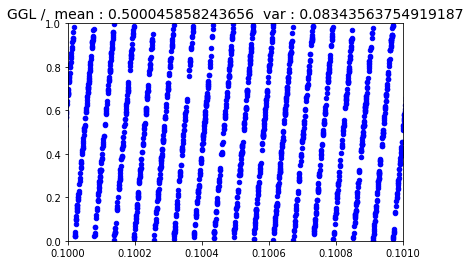

In [ ]:
plot_rng(ggl_array,"GGL")

## RAN3

In [ ]:
#Array for the results of the generation
ran3 = []

#Initialize the values array with 55 random number which have been generated by the GGL RNG
values = ggl.get_list(55)

#compute the RNG with RAN3 algorithm
for y in range(len(values),len(values)+3000000):
  #compute the next rng with ran3 formnula
  actual_rn = ((values[y-55]-values[y-24])%(2**32))
  #add the rng to the end of the array values (will be used later on to be computed)
  values.append(actual_rn)
  #get directly the result between [0,1]
  ran3.append(actual_rn/(2**32))


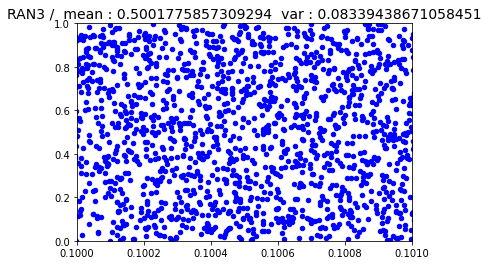

In [ ]:
plot_rng(ran3,"RAN3")

##Mersenne-Twister

In [ ]:
import random

mT = []
for i in range(3000000):
  mT.append(random.random())

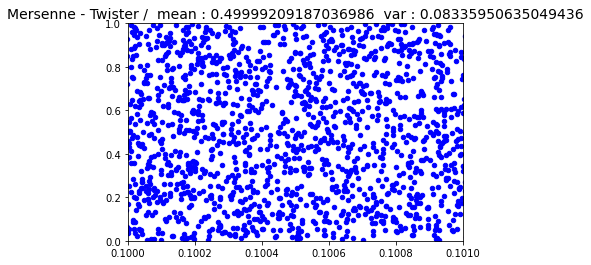

In [ ]:
plot_rng(mT,"Mersenne - Twister")

##Comparison

First of all, we can see on the graphs that the distribution of GGL is a bit different from RAN3 and Mersenne-Twister. With a small interval of observations, one can observe parallel lines of points. This can be explained by the correlation from which the GGL suffer and also the short period of steps.

Then, RAN3 and Mersenne-Twister distribution look almost the same : the points are well distributed and it seems that there is no correlation between the differents random numbers.

Concerning the mean and variance of the Rngs, it would seem that they are more or less all equal (0.5 mean, 0.083 var).

